In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurograndi/airplane-crashes-since-1908")

print("Path to dataset files:", path)

Path to dataset files: /Users/lubovsoldatenko/.cache/kagglehub/datasets/saurograndi/airplane-crashes-since-1908/versions/4


In [7]:
import data_loader as dl

# Указание пути к CSV-файлу
file_path = '/HW6/data/Airplane_Crashes_and_Fatalities_Since_1908.csv'

# Загрузка данных
loader = dl.LoadData()
df = loader.load_csv(file_path)

Файл //Users/lubovsoldatenko/DataspellProjects/datascience/HW6/data/Airplane_Crashes_and_Fatalities_Since_1908.csv успешно загружен.


Date — Дата аварии, в формате - January 01, 2001.

Time — Местное время, в 24-часовом формате, если не указано иначе.

Location — Местоположение аварии.

Operator — Авиакомпания или оператор воздушного судна.

Flight # — Номер рейса, назначенный оператором воздушного судна.

Route — Полный или частичный маршрут, пройденный перед аварией.

Type — Тип воздушного судна.

Registration — Регистрационный номер ICAO воздушного судна.

cn/In — Номер конструкции или серийный номер / Линейный или фюзеляжный номер.

Aboard — Общее количество находившихся на борту (пассажиров / экипаж).

Fatalities — Общее количество погибших на борту (пассажиров / экипаж).

Ground — Общее количество погибших на земле.

Summary — Краткое описание аварии и причины, если они известны.

In [8]:
# Просмотр данных
df.head(10)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


In [9]:
# Информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [10]:
# Базовая статистика
df.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [11]:
# Количество значений в датасете
len(df)

5268

In [12]:
# Упрощение Date
import pandas as pd
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [13]:
from HW6.data_analyzer import MissingValuesHandler

# Создаем объект обработчика
handler = MissingValuesHandler(df)

# Поиск дубликатов
handler.find_duplicates()


 Найдено 0 дубликатов.


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Day,Month,Year


In [14]:
# Подсчет пропущенных значений
handler.count_missing_values()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
Day                0
Month              0
Year               0
dtype: int64

In [15]:
# Отчет о пропущенных данных
handler.missing_values_report()


 Отчет о пропущенных значениях:
              Missing Values  Missing Percentage
Date                       0            0.000000
Time                    2219           42.122248
Location                  20            0.379651
Operator                  18            0.341686
Flight #                4199           79.707669
Route                   1707           32.403189
Type                      27            0.512528
Registration             335            6.359150
cn/In                   1228           23.310554
Aboard                    22            0.417616
Fatalities                12            0.227790
Ground                    22            0.417616
Summary                  390            7.403189
Day                        0            0.000000
Month                      0            0.000000
Year                       0            0.000000


In [16]:
# Заполнение пропущенных значений в числовых колонках медианой
numeric_columns = ['Aboard', 'Fatalities', 'Ground']
for col in numeric_columns:
    if col in df.columns:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Числовой столбец '{col}' заполнен медианой: {median_value}")

Числовой столбец 'Aboard' заполнен медианой: 13.0
Числовой столбец 'Fatalities' заполнен медианой: 9.0
Числовой столбец 'Ground' заполнен медианой: 0.0


In [17]:
# Заполнение пропущенных значений в категориальных колонках строкой 'Unknown'
categorical_columns = ['Location', 'Operator', 'Flight #', 'Route', 'Type', 'Registration', 'Summary', 'cn/In']
for col in categorical_columns:
    if col in df.columns:
        df[col].fillna('Unknown', inplace=True)
        print(f"Категориальный столбец '{col}' заполнен значением: 'Unknown'")

Категориальный столбец 'Location' заполнен значением: 'Unknown'
Категориальный столбец 'Operator' заполнен значением: 'Unknown'
Категориальный столбец 'Flight #' заполнен значением: 'Unknown'
Категориальный столбец 'Route' заполнен значением: 'Unknown'
Категориальный столбец 'Type' заполнен значением: 'Unknown'
Категориальный столбец 'Registration' заполнен значением: 'Unknown'
Категориальный столбец 'Summary' заполнен значением: 'Unknown'
Категориальный столбец 'cn/In' заполнен значением: 'Unknown'


In [18]:
# Кодирование категориальнх признаков
df['Location'] = df['Location'].astype('category').cat.codes
df['Operator'] = df['Operator'].astype('category').cat.codes
df['Route'] = df['Route'].astype('category').cat.codes
df['Flight #'] = df['Flight #'].astype('category').cat.codes
df['Type'] = df['Type'].astype('category').cat.codes
df['cn/In'] = df['cn/In'].astype('category').cat.codes
df['Registration'] = df['Registration'].astype('category').cat.codes
df['Summary'] = df['Summary'].astype('category').cat.codes

In [19]:
import pandas as pd
# Преобразование колонки 'Date' в формат datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')

In [20]:
# Информация о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5268 non-null   datetime64[ns]
 1   Time          3049 non-null   object        
 2   Location      5268 non-null   int16         
 3   Operator      5268 non-null   int16         
 4   Flight #      5268 non-null   int16         
 5   Route         5268 non-null   int16         
 6   Type          5268 non-null   int16         
 7   Registration  5268 non-null   int16         
 8   cn/In         5268 non-null   int16         
 9   Aboard        5268 non-null   float64       
 10  Fatalities    5268 non-null   float64       
 11  Ground        5268 non-null   float64       
 12  Summary       5268 non-null   int16         
 13  Day           5268 non-null   int32         
 14  Month         5268 non-null   int32         
 15  Year          5268 non-null   int32   

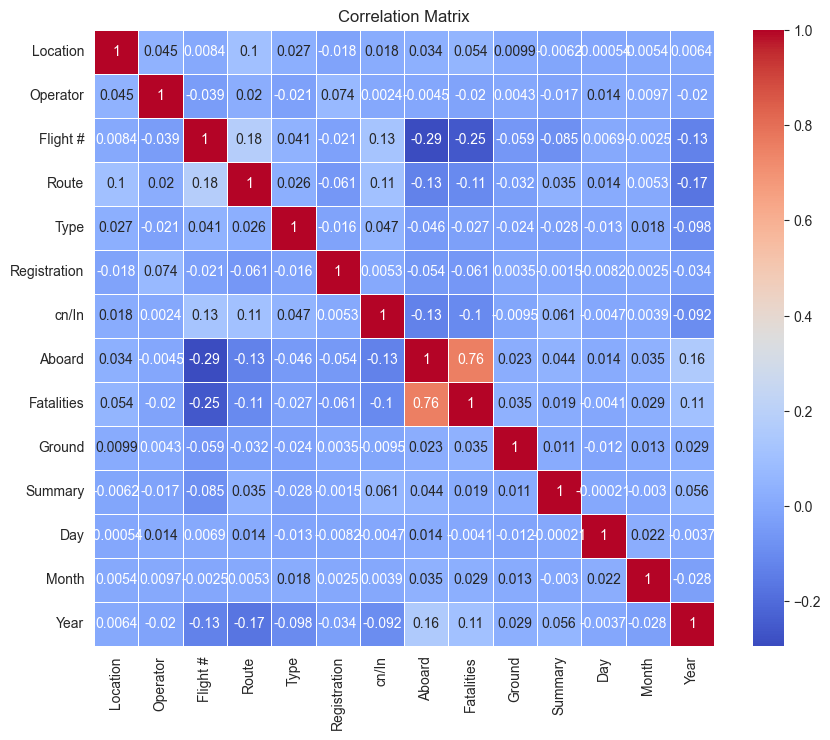

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
# Создаем корреляционную матрицу для числовых колонок
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [22]:
#Удаление признаков
df = df.drop(columns=['Aboard'])
df = df.drop(columns=['Time'])

In [23]:
# Просмотр данных
df.head(10)

,Date,Location,Operator,Flight #,Route,Type,Registration,cn/In,Fatalities,Ground,Summary,Day,Month,Year
0,1908-09-17,845,1566,723,828,2336,4416,169,1.0,0.0,1543,17,9,1908
1,1912-07-12,121,1577,723,2978,1061,4416,3702,5.0,0.0,1674,12,7,1912
2,1913-08-06,4177,1823,0,3091,1023,4416,3702,1.0,0.0,3600,6,8,1913
3,1913-09-09,3385,1465,723,3091,2350,4416,3702,14.0,0.0,3253,9,9,1913
4,1913-10-17,2292,1465,723,3091,2352,4416,3702,30.0,0.0,1816,17,10,1913
5,1915-03-05,4056,1465,723,3091,2363,4416,3702,21.0,0.0,1188,5,3,1915
6,1915-09-03,3114,1465,723,3091,2351,4416,3702,19.0,0.0,1635,3,9,1915
7,1916-07-28,2286,1464,723,3091,2068,4416,3702,20.0,0.0,1202,28,7,1916
8,1916-09-24,281,1465,723,3091,2356,4416,3702,22.0,0.0,2206,24,9,1916
9,1916-10-01,3547,1465,723,3091,2355,4416,3702,19.0,0.0,2262,1,10,1916


Данные не имеют дубликатов и пропусков

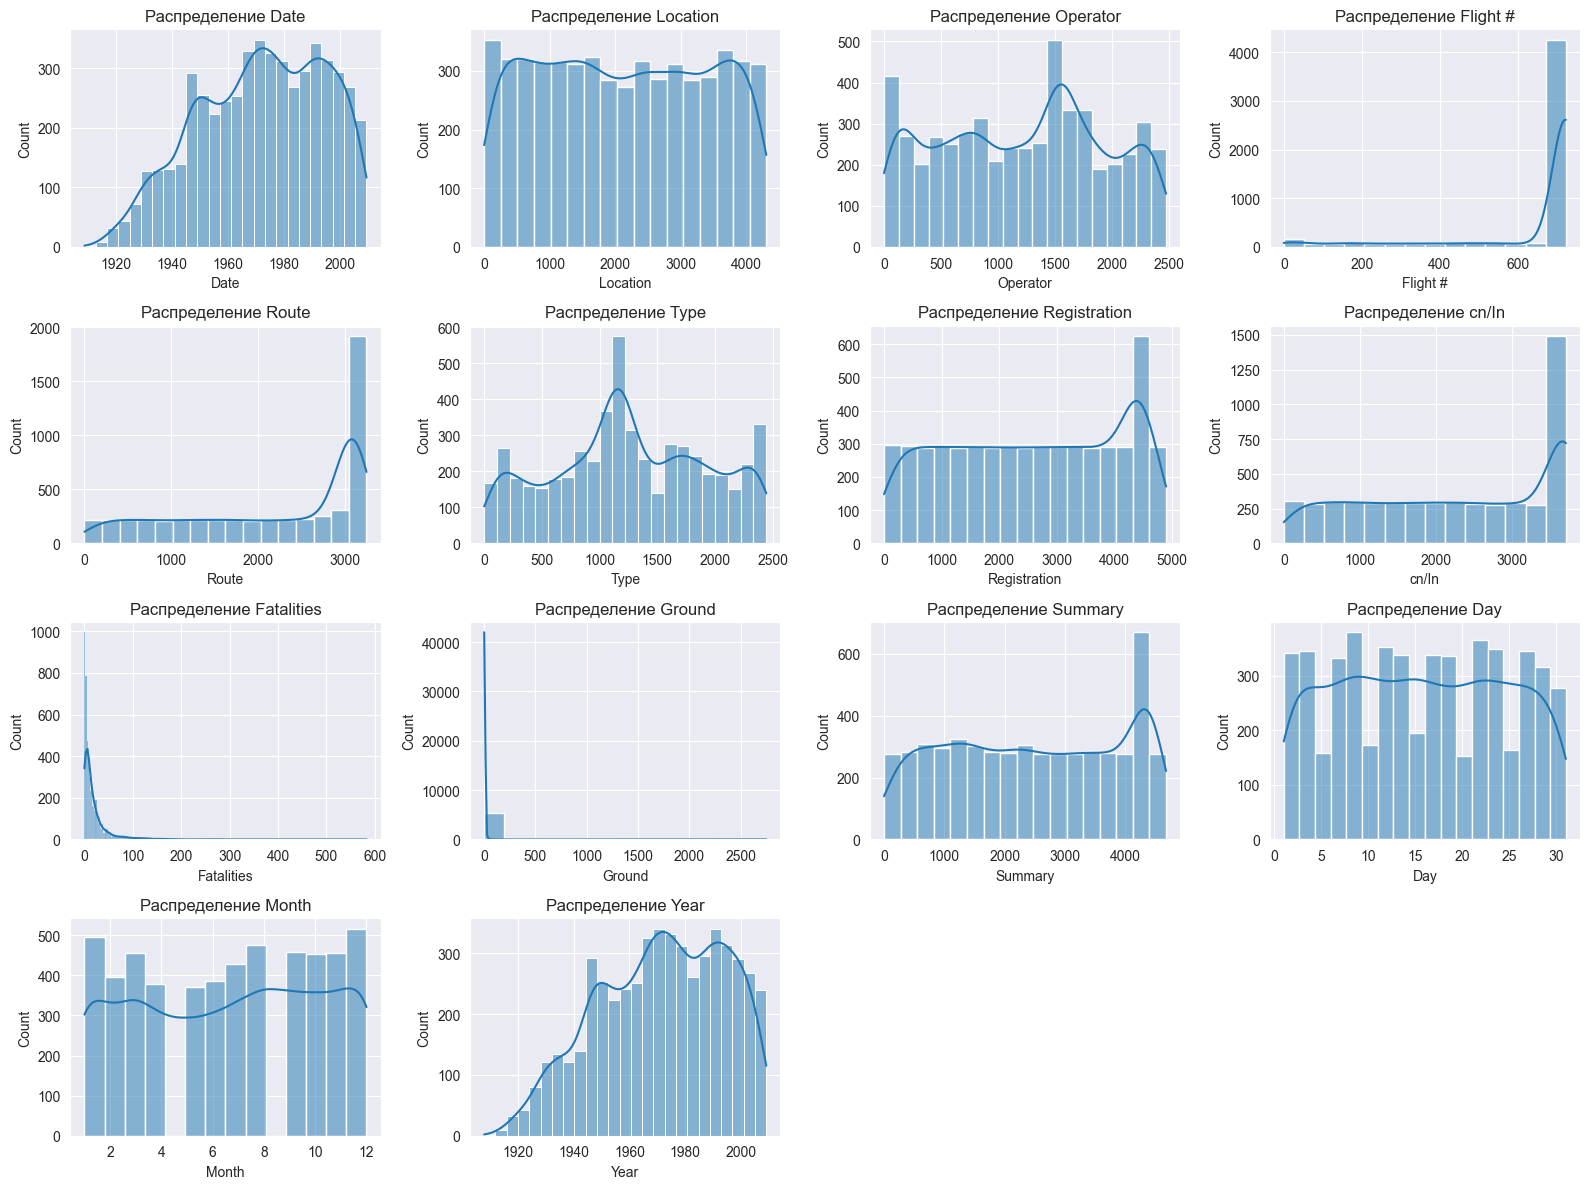

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация распределения данных для каждого признака
plt.figure(figsize=(16, 12))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)  # Сетка 4x4 для отображения всех признаков
    sns.histplot(df[col], kde=True)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()


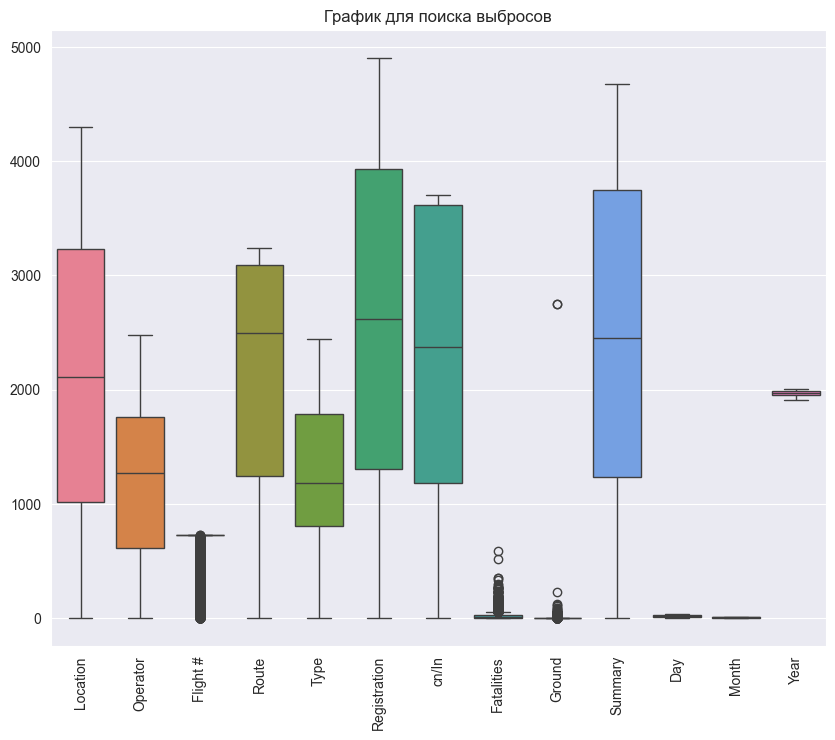

In [25]:
# Ящик с усами
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('График для поиска выбросов')
plt.show()

In [26]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Создадим числовые признаки на основе даты, но не удаляем оригинальные
for col in df.select_dtypes(include=['datetime64[ns]']).columns:
    min_date = df[col].min()
    df[col + '_days_since'] = (df[col] - min_date).dt.days

# Выбираем числовые признаки (включая преобразованные даты)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_columns]

# Нормализация числовых признаков
scaler = StandardScaler()
df_normalized = df_numeric.copy()
df_normalized[df_numeric.columns] = scaler.fit_transform(df_numeric)

# Применение Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly_if'] = model.fit_predict(df_normalized)

# Количество найденных аномалий
print(f"Количество найденных аномалий (Isolation Forest): {(df['anomaly_if'] == -1).sum()}")


Количество найденных аномалий (Isolation Forest): 264


In [27]:
from sklearn.neighbors import LocalOutlierFactor

# Применение Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df['anomaly_lof'] = lof.fit_predict(df_normalized)

# Количество найденных аномалий
print(f"Количество найденных аномалий (LOF): {(df['anomaly_lof'] == -1).sum()}")


Количество найденных аномалий (LOF): 264


Совпадений: 4974/5268 (94.42%)
Несовпадений: 294/5268 (5.58%)


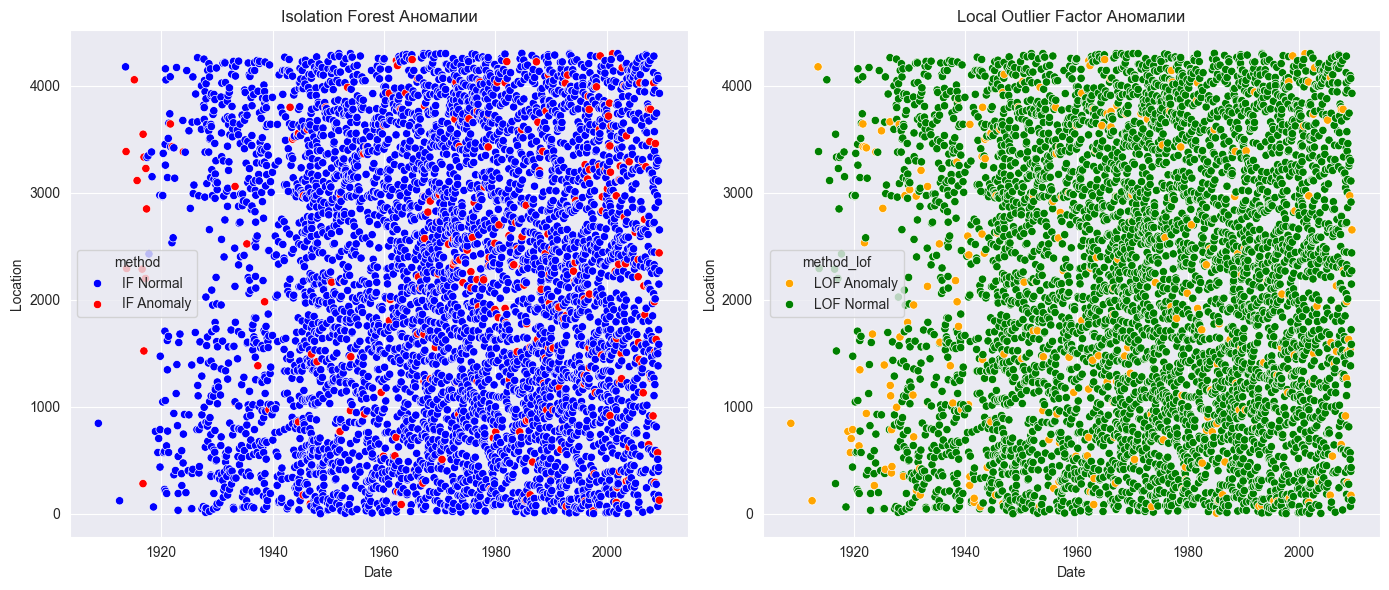

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Таблица сравнения
comparison = df[['anomaly_if', 'anomaly_lof']].copy()
comparison['Match'] = comparison['anomaly_if'] == comparison['anomaly_lof']

# 2. Количество совпадений и несовпадений
matches = comparison['Match'].sum()
total = len(comparison)
print(f"Совпадений: {matches}/{total} ({(matches/total)*100:.2f}%)")
print(f"Несовпадений: {total - matches}/{total} ({((total - matches)/total)*100:.2f}%)")

# 3. Подготовка данных для визуализации
df['method'] = df['anomaly_if'].apply(lambda x: 'IF Normal' if x == 1 else 'IF Anomaly')
df['method_lof'] = df['anomaly_lof'].apply(lambda x: 'LOF Normal' if x == 1 else 'LOF Anomaly')

# 4. Визуализация методом Scatter Plot (на первых двух признаках для наглядности)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue='method', palette={'IF Normal': 'blue', 'IF Anomaly': 'red'})
plt.title('Isolation Forest Аномалии')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue='method_lof', palette={'LOF Normal': 'green', 'LOF Anomaly': 'orange'})
plt.title('Local Outlier Factor Аномалии')

plt.tight_layout()
plt.show()


In [29]:
# Создадим новый DataFrame, удаляя только те строки, которые оба метода пометили как аномалии
df_cleaned = df[~((df['anomaly_if'] == -1) & (df['anomaly_lof'] == -1))].copy()

# Удалим колонки с метками аномалий, если они больше не нужны
df_cleaned.drop(columns=['anomaly_if', 'anomaly_lof'], inplace=True)

# Размер нового DataFrame
print(f"Изначальный размер датасета: {df.shape}")
print(f"Размер датасета после удаления совпадающих аномалий: {df_cleaned.shape}")


Изначальный размер датасета: (5268, 19)
Размер датасета после удаления совпадающих аномалий: (5151, 17)


Данные были обработаны и не содержат выбросов

In [30]:
# Просмотр данных
df_cleaned.head(10)

,Date,Location,Operator,Flight #,Route,Type,Registration,cn/In,Fatalities,Ground,Summary,Day,Month,Year,Date_days_since,method,method_lof
0,1908-09-17,845,1566,723,828,2336,4416,169,1.0,0.0,1543,17,9,1908,0,IF Normal,LOF Anomaly
1,1912-07-12,121,1577,723,2978,1061,4416,3702,5.0,0.0,1674,12,7,1912,1394,IF Normal,LOF Anomaly
2,1913-08-06,4177,1823,0,3091,1023,4416,3702,1.0,0.0,3600,6,8,1913,1784,IF Normal,LOF Anomaly
3,1913-09-09,3385,1465,723,3091,2350,4416,3702,14.0,0.0,3253,9,9,1913,1818,IF Anomaly,LOF Normal
4,1913-10-17,2292,1465,723,3091,2352,4416,3702,30.0,0.0,1816,17,10,1913,1856,IF Anomaly,LOF Normal
5,1915-03-05,4056,1465,723,3091,2363,4416,3702,21.0,0.0,1188,5,3,1915,2360,IF Anomaly,LOF Normal
6,1915-09-03,3114,1465,723,3091,2351,4416,3702,19.0,0.0,1635,3,9,1915,2542,IF Anomaly,LOF Normal
7,1916-07-28,2286,1464,723,3091,2068,4416,3702,20.0,0.0,1202,28,7,1916,2871,IF Anomaly,LOF Normal
8,1916-09-24,281,1465,723,3091,2356,4416,3702,22.0,0.0,2206,24,9,1916,2929,IF Anomaly,LOF Normal
9,1916-10-01,3547,1465,723,3091,2355,4416,3702,19.0,0.0,2262,1,10,1916,2936,IF Anomaly,LOF Normal


In [33]:
#Удаление признаков
df_cleaned = df.drop(columns=['method'])
df_cleaned = df.drop(columns=['method_lof'])

KeyError: "['method_lof'] not found in axis"

In [34]:
df=df_cleaned
df.head(10)

,Date,Location,Operator,Flight #,Route,Type,Registration,cn/In,Fatalities,Ground,Summary,Day,Month,Year,Date_days_since,anomaly_if,anomaly_lof
0,1908-09-17,845,1566,723,828,2336,4416,169,1.0,0.0,1543,17,9,1908,0,1,-1
1,1912-07-12,121,1577,723,2978,1061,4416,3702,5.0,0.0,1674,12,7,1912,1394,1,-1
2,1913-08-06,4177,1823,0,3091,1023,4416,3702,1.0,0.0,3600,6,8,1913,1784,1,-1
3,1913-09-09,3385,1465,723,3091,2350,4416,3702,14.0,0.0,3253,9,9,1913,1818,-1,1
4,1913-10-17,2292,1465,723,3091,2352,4416,3702,30.0,0.0,1816,17,10,1913,1856,-1,1
5,1915-03-05,4056,1465,723,3091,2363,4416,3702,21.0,0.0,1188,5,3,1915,2360,-1,1
6,1915-09-03,3114,1465,723,3091,2351,4416,3702,19.0,0.0,1635,3,9,1915,2542,-1,1
7,1916-07-28,2286,1464,723,3091,2068,4416,3702,20.0,0.0,1202,28,7,1916,2871,-1,1
8,1916-09-24,281,1465,723,3091,2356,4416,3702,22.0,0.0,2206,24,9,1916,2929,-1,1
9,1916-10-01,3547,1465,723,3091,2355,4416,3702,19.0,0.0,2262,1,10,1916,2936,-1,1


Анализ временного ряда


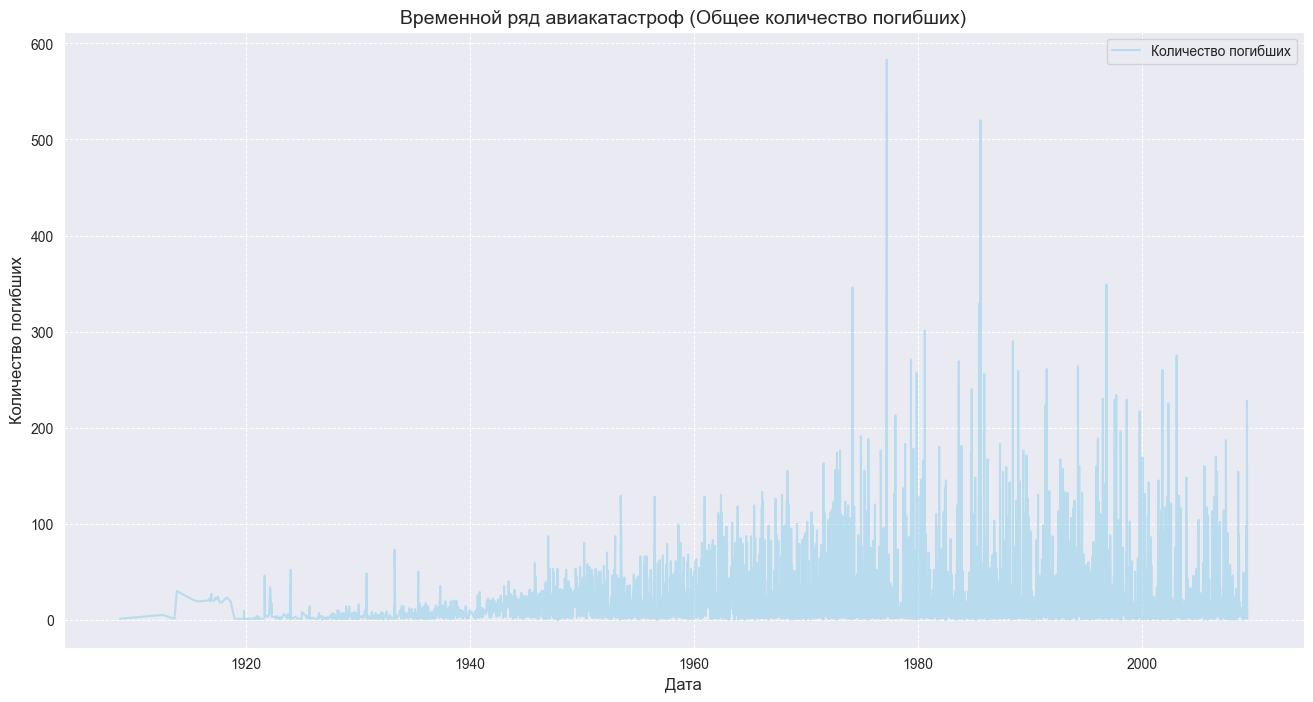

<Figure size 1000x400 with 0 Axes>

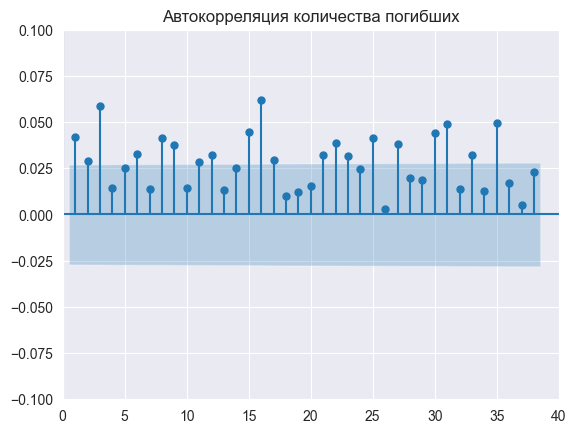

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf

# Преобразование колонки 'Date' в формат datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Сортируем данные по дате
df = df.sort_values(by='Date')

# Построение графика
plt.figure(figsize=(16, 8))
plt.plot(df['Date'], df['Fatalities'], color='skyblue', label='Количество погибших', alpha=0.5)
plt.title('Временной ряд авиакатастроф (Общее количество погибших)', fontsize=14)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество погибших', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.legend(fontsize=10)
plt.show()

# Построение автокорреляции
plt.figure(figsize=(10, 4))
plot_acf(df['Fatalities'])

# Настройка диапазонов для осей X и Y
x_range = (0, 40)
y_range = (-0.1, 0.1)
plt.xlim(x_range)
plt.ylim(y_range)

plt.title('Автокорреляция количества погибших')
plt.show()

In [36]:
# Проведение теста Дики-Фуллера
from statsmodels.tsa.stattools import adfuller
result = adfuller(df['Fatalities'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.283405
p-value: 0.000000
	1%: -3.432
	5%: -2.862
	10%: -2.567


ряд стационарный

ARIMA

In [37]:
print(df.columns.tolist())

['Date', 'Location', 'Operator', 'Flight #', 'Route', 'Type', 'Registration', 'cn/In', 'Fatalities', 'Ground', 'Summary', 'Day', 'Month', 'Year', 'Date_days_since', 'anomaly_if', 'anomaly_lof']


In [38]:
df['Fatalities'] = pd.to_numeric(df['Fatalities'], errors='coerce')


In [39]:
print(df['Fatalities'].dtypes)  # Должно вывести float64 или int64
print(df['Fatalities'].head())

float64
0     1.0
1     5.0
2     1.0
3    14.0
4    30.0
Name: Fatalities, dtype: float64


In [40]:
df = df.set_index('Date')
df = df.sort_index()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=43821.424, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=42634.060, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=43819.424, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=42052.655, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=41850.881, Time=0.30 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=41696.029, Time=0.37 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=41588.368, Time=0.50 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.40 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.13 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=41586.368, Time=0.31 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=41694.029, Time=0.24 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=1.71 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Ti

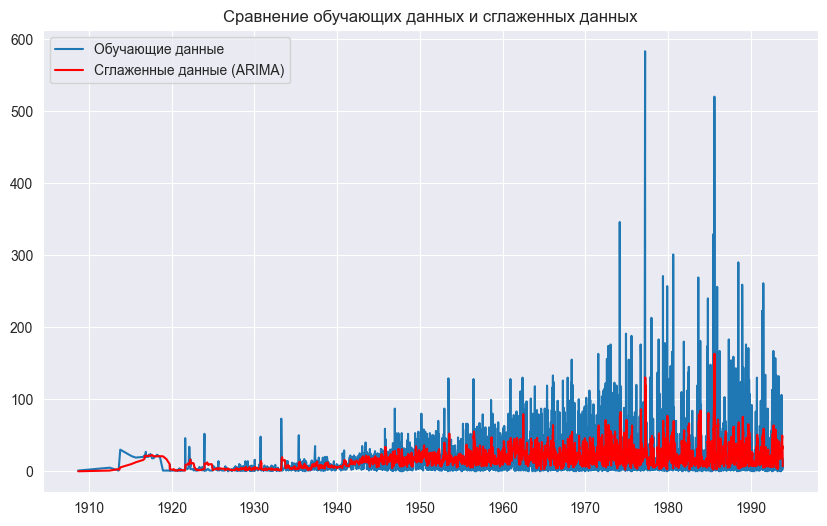

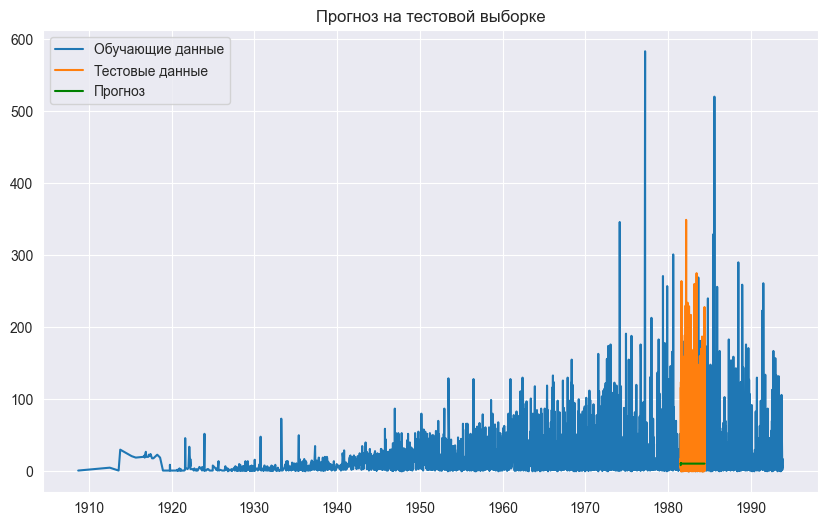

Mean Absolute Error (MAE): 17.822
Mean Squared Error (MSE): 1556.207
Root Mean Squared Error (RMSE): 39.449
Mean Absolute Percentage Error (MAPE): 213.391%


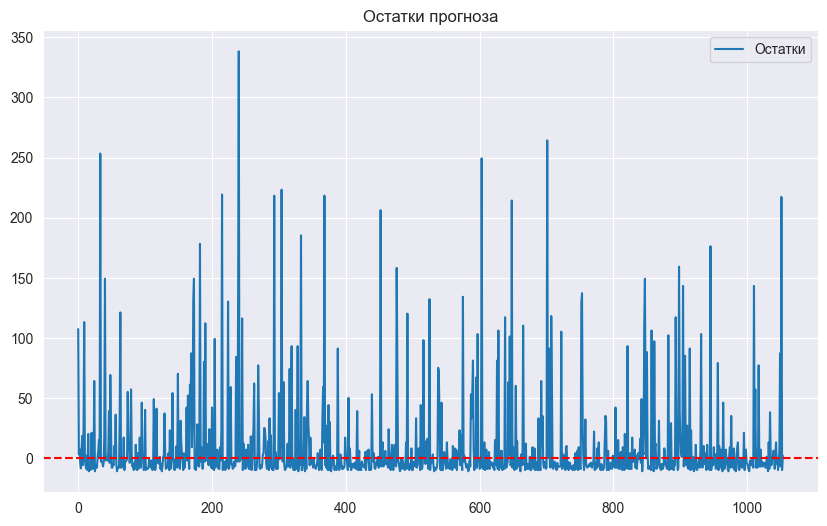

In [40]:
# Обучение модели ARIMA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
from pmdarima import auto_arima

# Отключение предупреждений
warnings.filterwarnings("ignore")

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(df['Fatalities']) * 0.8)
train_data, test_data = df['Fatalities'][:train_size], df['Fatalities'][train_size:]

# Автоматический подбор параметров (p, d, q)
model_auto = auto_arima(train_data, seasonal=False, stepwise=True, trace=True)
print(model_auto.summary())

# Прогнозирование для тестовой выборки
model_fit = model_auto.fit(train_data)
forecast_test = model_fit.predict(n_periods=len(test_data))

# Получение сглаженных значений на обучающей выборке
fitted_values = model_fit.predict_in_sample()

# Визуализация исходных данных и сглаженных данных с использованием модели ARIMA
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Обучающие данные')
plt.plot(fitted_values, color='red', label='Сглаженные данные (ARIMA)')
plt.title('Сравнение обучающих данных и сглаженных данных')
plt.legend()
plt.show()

# Визуализация прогноза на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Обучающие данные')
plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), test_data, label='Тестовые данные')
plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), forecast_test, color='green', label='Прогноз')
plt.title('Прогноз на тестовой выборке')
plt.legend()
plt.show()

# Метрики качества
mae = mean_absolute_error(test_data, forecast_test)
mse = mean_squared_error(test_data, forecast_test)
rmse = np.sqrt(mse)

# Убедимся, что длины и индексы совпадают
test_data = test_data.reset_index(drop=True)
forecast_test = forecast_test.reset_index(drop=True)

# Создаем маску без нулевых значений
non_zero_mask = test_data != 0

# Вычисляем MAPE
mape = np.mean(np.abs((test_data[non_zero_mask] - forecast_test[non_zero_mask]) / test_data[non_zero_mask])) * 100



print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.3f}%')

# Визуализация остатков
residuals = test_data - forecast_test
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Остатки')
plt.axhline(0, linestyle='--', color='red')
plt.title('Остатки прогноза')
plt.legend()
plt.grid(True)
plt.show()

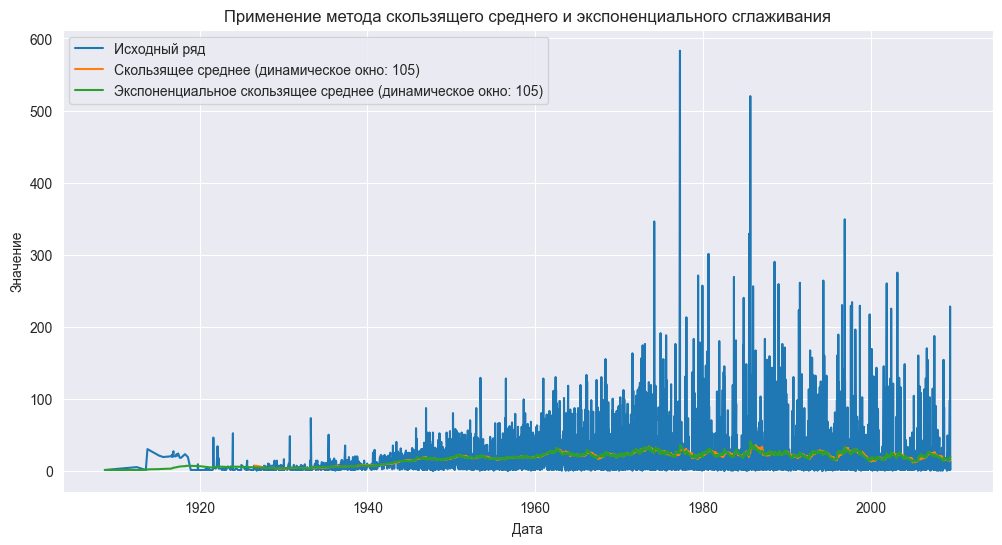

In [41]:
# Метод скользящего среднего (Moving Average) и Экспоненциальное скользящее среднее (ema)
import matplotlib.pyplot as plt

# Автоматический расчет размера окна
window_size = max(1, len(df['Fatalities']) // 50)  # Пример: 1/50 от общего числа данных или минимум 1

# Метод скользящего среднего (Moving Average)
moving_average = df['Fatalities'].rolling(window=window_size).mean()  # для заполнения пустых значений: .fillna(method='bfill')

# Применяем экспоненциальное скользящее среднее
ema = df['Fatalities'].ewm(span=window_size, adjust=False).mean()

# Визуализируем исходный временной ряд, скользящее среднее и экспоненциальное сглаживание
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Fatalities'], label='Исходный ряд')
plt.plot(moving_average.index, moving_average, label=f'Скользящее среднее (динамическое окно: {window_size})')
plt.plot(ema.index, ema, label=f'Экспоненциальное скользящее среднее (динамическое окно: {window_size})')
plt.title("Применение метода скользящего среднего и экспоненциального сглаживания")
plt.xlabel("Дата")
plt.ylabel("Значение")
plt.legend()
plt.grid(True)
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76520D+00    |proj g|=  6.32416D-01


 This problem is unconstrained.



At iterate    5    f=  5.44581D+00    |proj g|=  2.72370D-02

At iterate   10    f=  5.19934D+00    |proj g|=  1.58789D-01

At iterate   15    f=  5.18119D+00    |proj g|=  2.93024D-04

At iterate   20    f=  5.16629D+00    |proj g|=  4.01919D-02

At iterate   25    f=  5.16413D+00    |proj g|=  1.99179D-02

At iterate   30    f=  5.16142D+00    |proj g|=  2.38730D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     50      1     0     0   1.322D-05   5.161D+00
  F =   5.1614216968624893     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


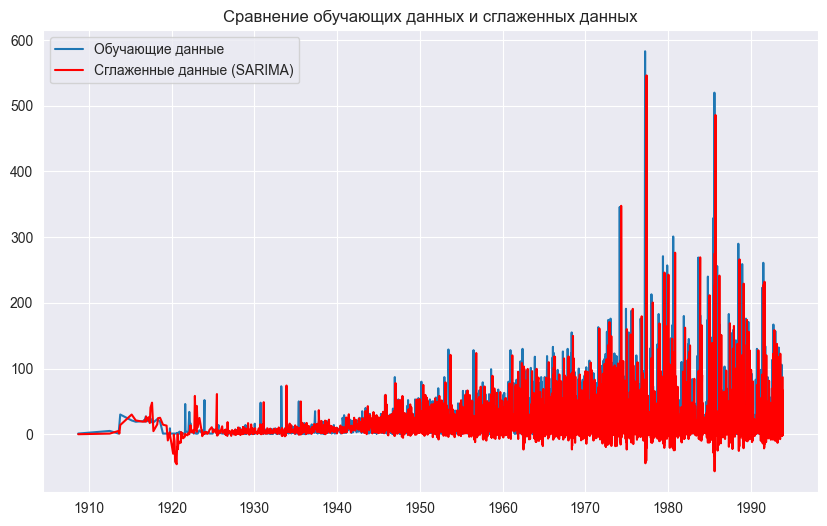

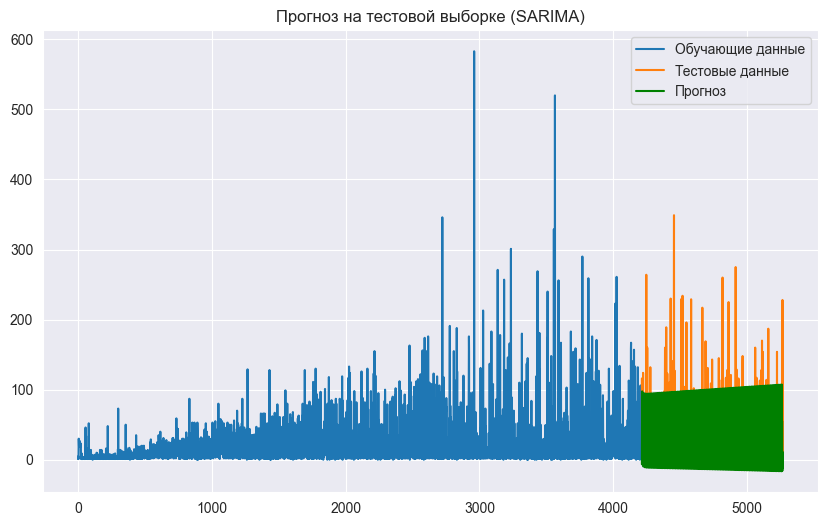

Mean Absolute Error (MAE): 31.567
Mean Squared Error (MSE): 2429.412
Root Mean Squared Error (RMSE): 49.289


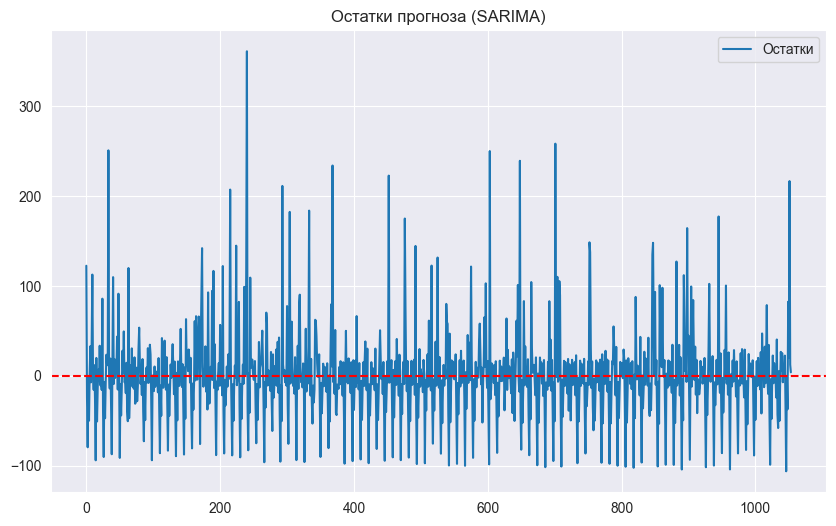

In [42]:
# Модели SARIMA (Seasonal ARIMA)
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

# Отключение предупреждений
warnings.filterwarnings("ignore")

# Разделение данных на обучающую и тестовую выборки
train_size = int(len(df['Fatalities']) * 0.8)
train_data, test_data = df['Fatalities'][:train_size], df['Fatalities'][train_size:]

# Построение модели SARIMA с произвольными параметрами
model = SARIMAX(train_data, order=(2, 1, 2), seasonal_order=(0, 2, 1, 12))
model_fit = model.fit()

# Визуализация исходных данных и сглаженных данных с использованием модели SARIMA
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Обучающие данные')
plt.plot(model_fit.fittedvalues, color='red', label='Сглаженные данные (SARIMA)')
plt.title('Сравнение обучающих данных и сглаженных данных')
plt.legend()
plt.show()

# Прогнозирование для тестовой выборки
forecast_test = model_fit.forecast(steps=len(test_data))

# Визуализация прогноза на тестовой выборке
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train_data)), train_data, label='Обучающие данные')
plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), test_data, label='Тестовые данные')
plt.plot(np.arange(len(train_data), len(train_data) + len(test_data)), forecast_test, color='green', label='Прогноз')
plt.title('Прогноз на тестовой выборке (SARIMA)')
plt.legend()
plt.show()

# Убедимся, что длины и индексы совпадают
test_data = test_data.reset_index(drop=True)
forecast_test = forecast_test.reset_index(drop=True)

# Создаем маску без нулевых значений
non_zero_mask = test_data != 0

# Метрики качества
mae = mean_absolute_error(test_data, forecast_test)
mse = mean_squared_error(test_data, forecast_test)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')

# Визуализация остатков
residuals = test_data - forecast_test
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Остатки')
plt.axhline(0, linestyle='--', color='red')
plt.title('Остатки прогноза (SARIMA)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3519/3519 - 8s - 2ms/step - loss: 0.0025
Epoch 2/10
3519/3519 - 7s - 2ms/step - loss: 0.0025
Epoch 3/10
3519/3519 - 7s - 2ms/step - loss: 0.0025
Epoch 4/10
3519/3519 - 7s - 2ms/step - loss: 0.0025
Epoch 5/10
3519/3519 - 7s - 2ms/step - loss: 0.0024
Epoch 6/10
3519/3519 - 7s - 2ms/step - loss: 0.0024
Epoch 7/10
3519/3519 - 7s - 2ms/step - loss: 0.0024
Epoch 8/10
3519/3519 - 7s - 2ms/step - loss: 0.0024
Epoch 9/10
3519/3519 - 7s - 2ms/step - loss: 0.0024
Epoch 10/10
3519/3519 - 7s - 2ms/step - loss: 0.0024
Epoch 1/10
3519/3519 - 8s - 2ms/step - loss: 0.0025
Epoch 2/10
3519/3519 - 7s - 2ms/step - loss: 0.0025
Epoch 3/10
3519/3519 - 7s - 2ms/step - loss: 0.0025
Epoch 4/10
3519/3519 - 7s - 2ms/step - loss: 0.0025
Epoch 5/10
3519/3519 - 7s - 2ms/step - loss: 0.0025
Epoch 6/10
3519/3519 - 7s - 2ms/step - loss: 0.0025
Epoch 7/10
3519/3519 - 7s - 2ms/step - loss: 0.0025
Epoch 8/10
3519/3519 - 7s - 2ms/step - loss: 0.0025
Epoch 9/10
3519/3519 - 7s - 2ms/step - loss: 0.0025
Epoch 10/10
3519/3519 

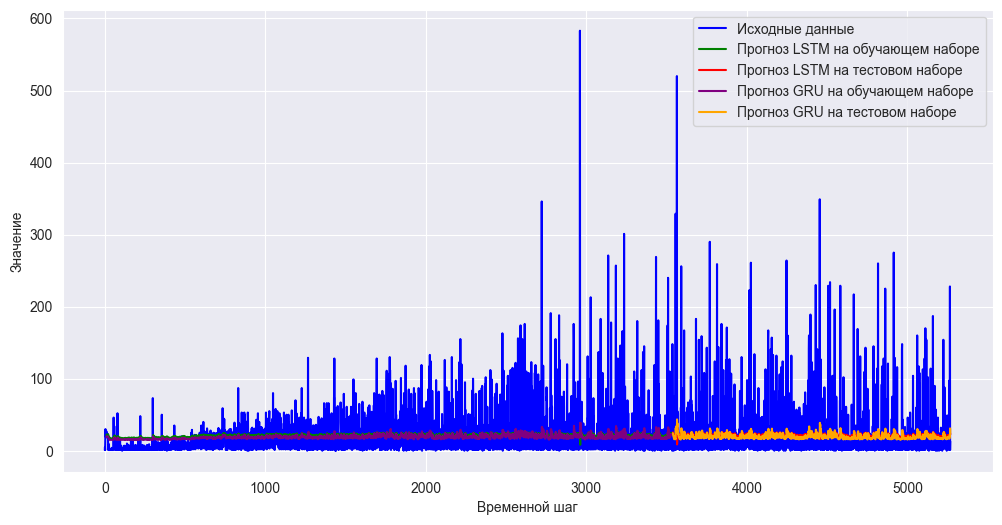

In [41]:
# LSTM и GRU
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense


# Преобразуйте данные в массив NumPy
data_values =df['Fatalities'].values.reshape(-1, 1)

# Нормализуйте данные (масштабируйте в диапазон [0, 1])
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_values)

# Разбиваем данные на обучающий и тестовый наборы
train_size = int(len(data_scaled) * 0.67)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

# Функция для создания датасета с последовательными данными
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back)])
        Y.append(dataset[i + look_back])
    return np.array(X), np.array(Y)

look_back = 10  # Количество предыдущих временных шагов для учитывания

X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Подготовка данных в формате (количество примеров, количество временных шагов, количество признаков)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Создаем модель LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, input_shape=(look_back, 1)))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Обучаем модель LSTM
model_lstm.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Создаем модель GRU
model_gru = Sequential()
model_gru.add(GRU(units=50, input_shape=(look_back, 1)))
model_gru.add(Dense(units=1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

# Обучаем модель GRU
model_gru.fit(X_train, y_train, epochs=10, batch_size=1, verbose=2)

# Делаем прогнозы с использованием обеих моделей
train_predict_lstm = model_lstm.predict(X_train)
test_predict_lstm = model_lstm.predict(X_test)

train_predict_gru = model_gru.predict(X_train)
test_predict_gru = model_gru.predict(X_test)

# Инвертируем масштабирование данных
train_predict_lstm = scaler.inverse_transform(train_predict_lstm)
test_predict_lstm = scaler.inverse_transform(test_predict_lstm)

train_predict_gru = scaler.inverse_transform(train_predict_gru)
test_predict_gru = scaler.inverse_transform(test_predict_gru)

# Визуализируем прогнозы
train_plot_lstm = np.empty_like(data_scaled)
train_plot_lstm[:] = np.nan
train_plot_lstm[look_back:len(train_predict_lstm) + look_back, 0] = train_predict_lstm[:, 0]

test_plot_lstm = np.empty_like(data_scaled)
test_plot_lstm[:] = np.nan
offset = len(train_predict_lstm) + (look_back * 2)
test_plot_lstm[offset:len(test_predict_lstm) + offset, 0] = test_predict_lstm[:, 0]

train_plot_gru = np.empty_like(data_scaled)
train_plot_gru[:] = np.nan
train_plot_gru[look_back:len(train_predict_gru) + look_back, 0] = train_predict_gru[:, 0]

test_plot_gru = np.empty_like(data_scaled)
test_plot_gru[:] = np.nan
offset = len(train_predict_gru) + (look_back * 2)
test_plot_gru[offset:len(test_predict_gru) + offset, 0] = test_predict_gru[:, 0]

# Визуализируем результаты
plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(data_scaled), label='Исходные данные', color='blue')
plt.plot(train_plot_lstm, label='Прогноз LSTM на обучающем наборе', color='green')
plt.plot(test_plot_lstm, label='Прогноз LSTM на тестовом наборе', color='red')
plt.plot(train_plot_gru, label='Прогноз GRU на обучающем наборе', color='purple')
plt.plot(test_plot_gru, label='Прогноз GRU на тестовом наборе', color='orange')
plt.xlabel('Временной шаг')
plt.ylabel('Значение')
plt.legend()
plt.show()